<a href="https://colab.research.google.com/github/FucsikovaTereza/SKE/blob/main/SKE_Fucsikova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install reliability
!pip install lifelines
from reliability.Fitters import Fit_Everything, Fit_Weibull_CR
from reliability.Nonparametric import KaplanMeier, NelsonAalen
from lifelines import KaplanMeierFitter, WeibullFitter
import numpy as np
from scipy.integrate import simps
from numpy import trapz
from sklearn.metrics import auc

In [77]:
url = 'https://raw.githubusercontent.com/FucsikovaTereza/SKE/main/Data%20set%20SKE_VeteranClinicTrial_modified.csv'
data = pd.read_csv(url)
data.head()

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10


In [78]:
stats = data.describe()
stats.applymap(lambda x: '{:.0f}'.format(x) if x % 1 == 0 else x)

,treat,cell,survt,cens,KAR,didur,age,prith
count,137,137,137,137,137,137,137,137
mean,1.49635,2.33577,121.628,0.744526,58.5693,8.77372,58.3066,2.91971
std,0.501821,1.06604,157.817,0.437728,20.0396,10.6121,10.5416,4.56337
min,1,1,1,0,10,1,34,0
25%,1,1,25,0,40,3,51,0
50%,1,2,80,1,60,5,62,0
75%,2,3,144,1,75,11,66,10
max,2,4,999,1,99,87,81,10


In [79]:
filtered_data = data.query('prith == 0')
filtered_data.head()

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
2,1,1,228,1,60,3,38,0
5,1,1,10,1,20,5,49,0
7,1,1,110,0,80,29,68,0
8,1,1,314,1,50,18,43,0


In [80]:
stats2 = filtered_data.describe()
stats2.applymap(lambda x: '{:.0f}'.format(x) if x % 1 == 0 else x)

,treat,cell,survt,cens,KAR,didur,age,prith
count,97,97,97,97,97,97,97,97
mean,1.50515,2.36082,112.155,0.742268,59.3196,5.93814,58.9794,0
std,0.502571,1.01227,121.944,0.439658,20.5018,5.86624,10.7082,0
min,1,1,1,0,10,1,34,0
25%,1,2,29,0,40,3,52,0
50%,2,2,80,1,60,4,62,0
75%,2,3,139,1,80,7,66,0
max,2,4,587,1,99,36,81,0


# A) Spolehlivostní model pro časy dožití podskupin pacientů lék/placebo

In [81]:
standard = filtered_data.query('treat==1')
test = filtered_data.query('treat==2')

## Lék

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 35/13 (27.08333% right censored) 

   Distribution   Alpha     Beta  Gamma Alpha 1  Beta 1 Alpha 2      Beta 2 Proportion 1 DS      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
     Weibull_CR                         171.281 0.92125     553 1.06567e+07                                                    -199.75  408.43 414.984 1.60894       TNC
       Gamma_3P 283.235 0.634695 2.9999                                                                                       -209.704 425.954 431.022 1.72409       TNC
 Exponential_1P                                                                                             0.00602617        -213.908 429.902 431.686 1.67166       TNC
     Weibull_3P 160.963 0.755843 2.9999                                                                                       -210.845 428.236 433.304  1.6734       TNC
 Exponential_2P                  2.9999    

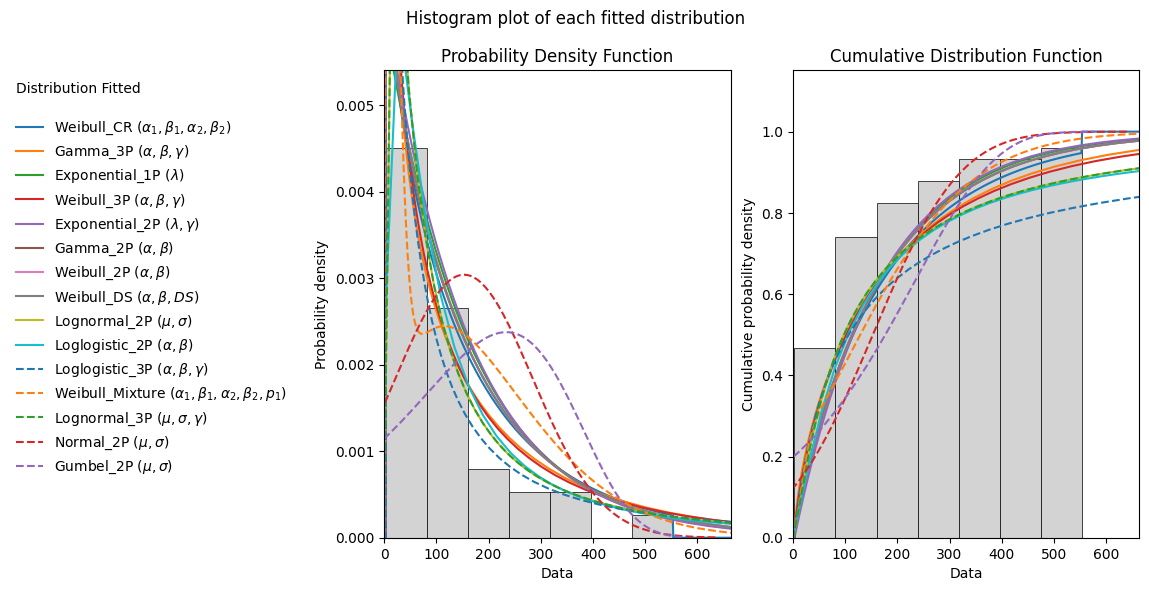

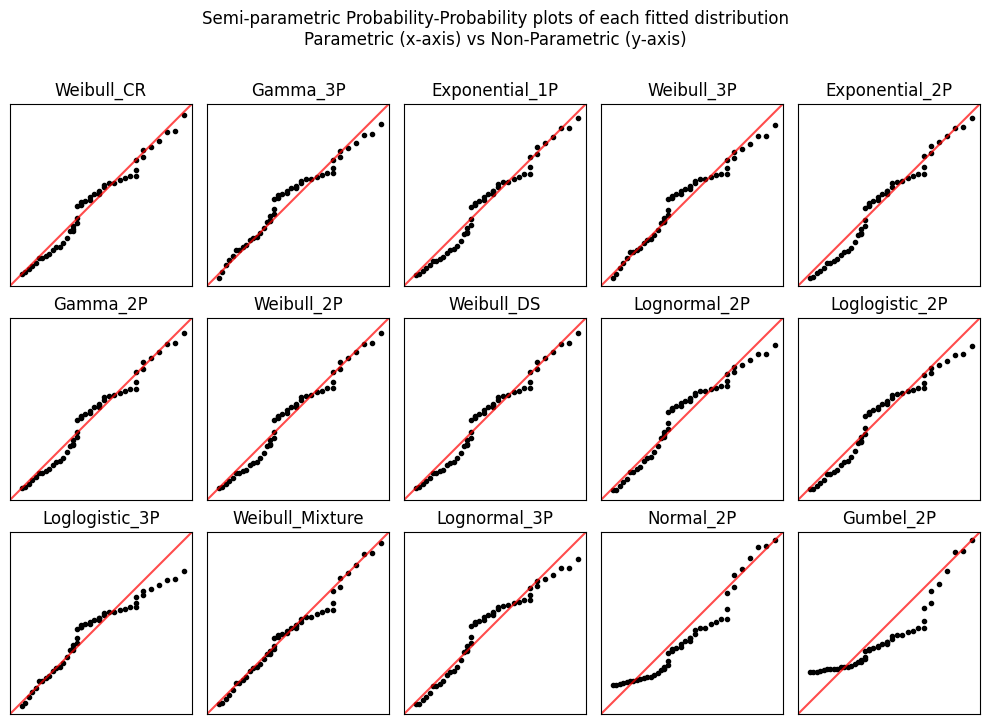

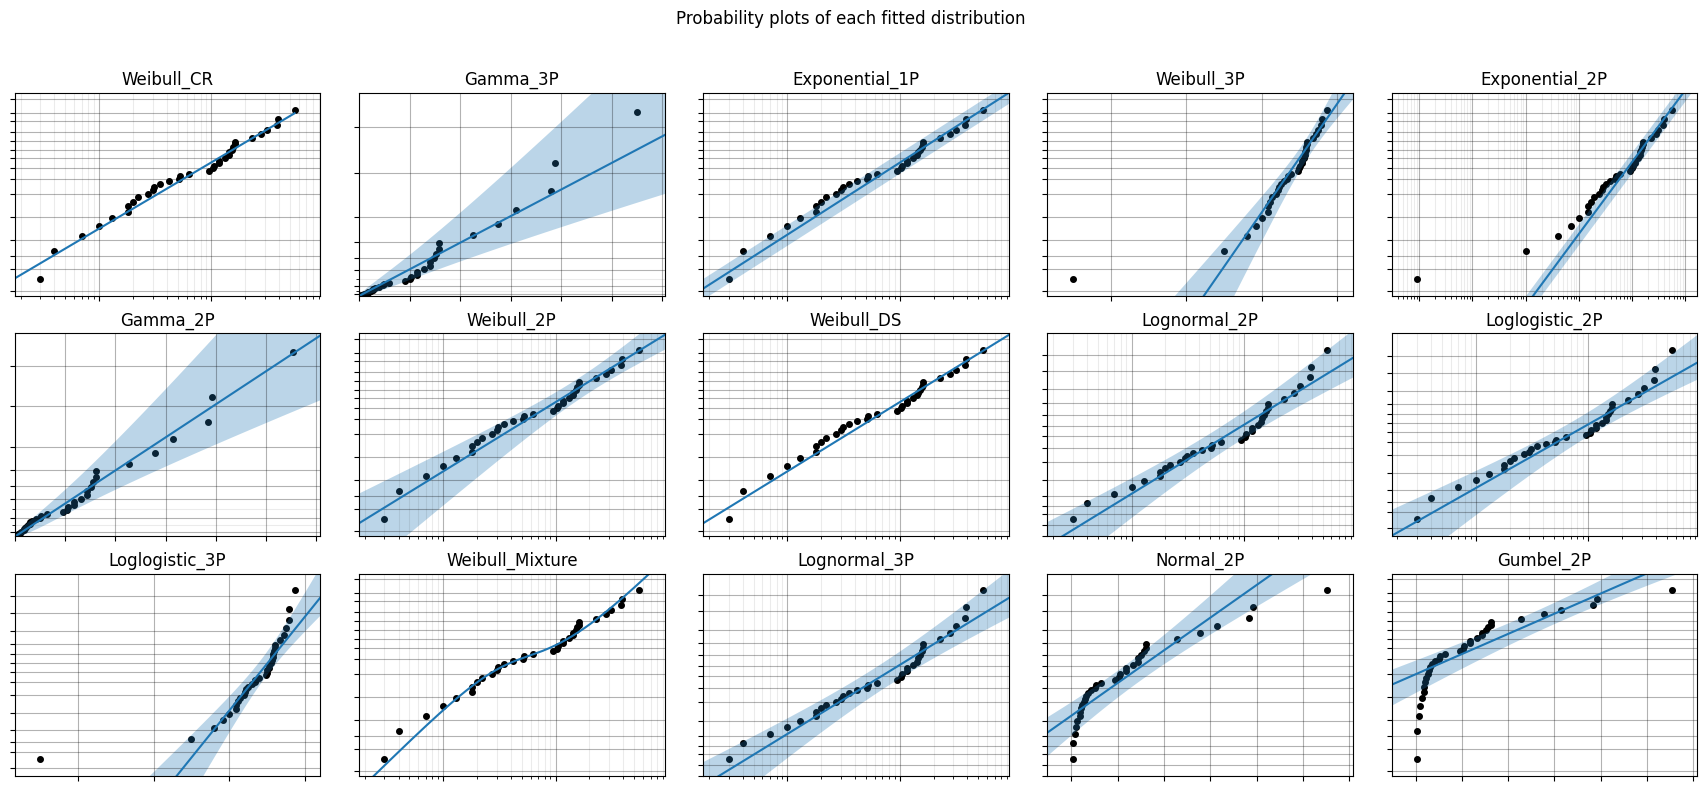

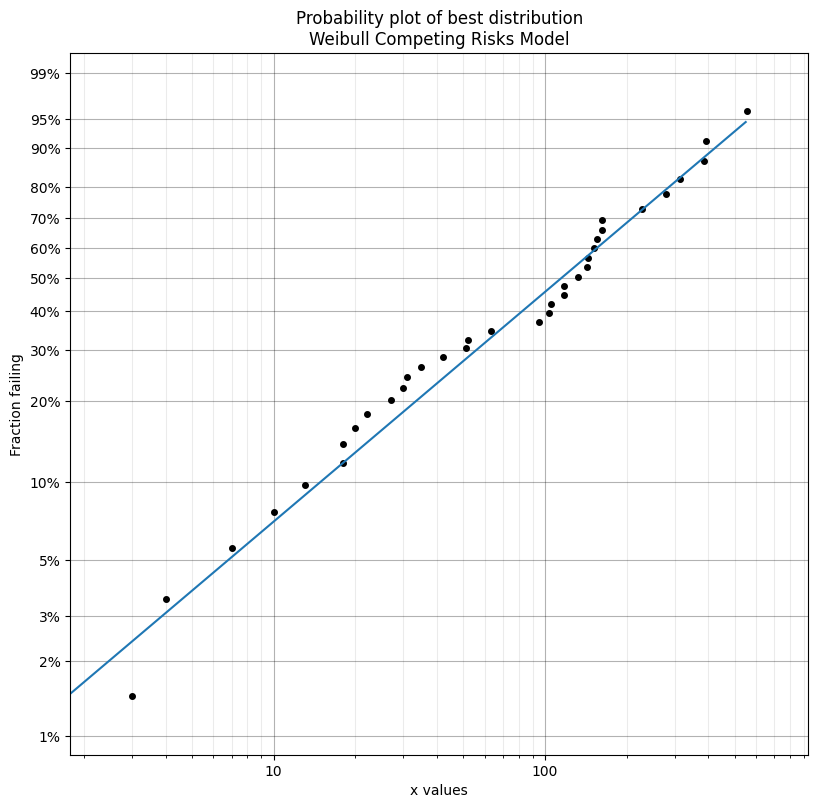

In [82]:
stat_standard = Fit_Everything(failures = standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values)

In [83]:
Weibull_CR_dist = Fit_Weibull_CR(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, show_probability_plot=False,).distribution

Results from Fit_Weibull_CR (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 35/13 (27.08333% right censored) 

Parameter  Point Estimate  Standard Error    Lower CI    Upper CI
  Alpha 1         171.281         32.0086     118.751     247.047
   Beta 1         0.92125        0.128226    0.701296     1.21019
  Alpha 2             553     5.20538e-05         553         553
   Beta 2     1.06567e+07     1.06573e+07 1.50097e+06 7.56607e+07 

Goodness of fit   Value
 Log-likelihood -199.75
           AICc  408.43
            BIC 414.984
             AD 1.60894 



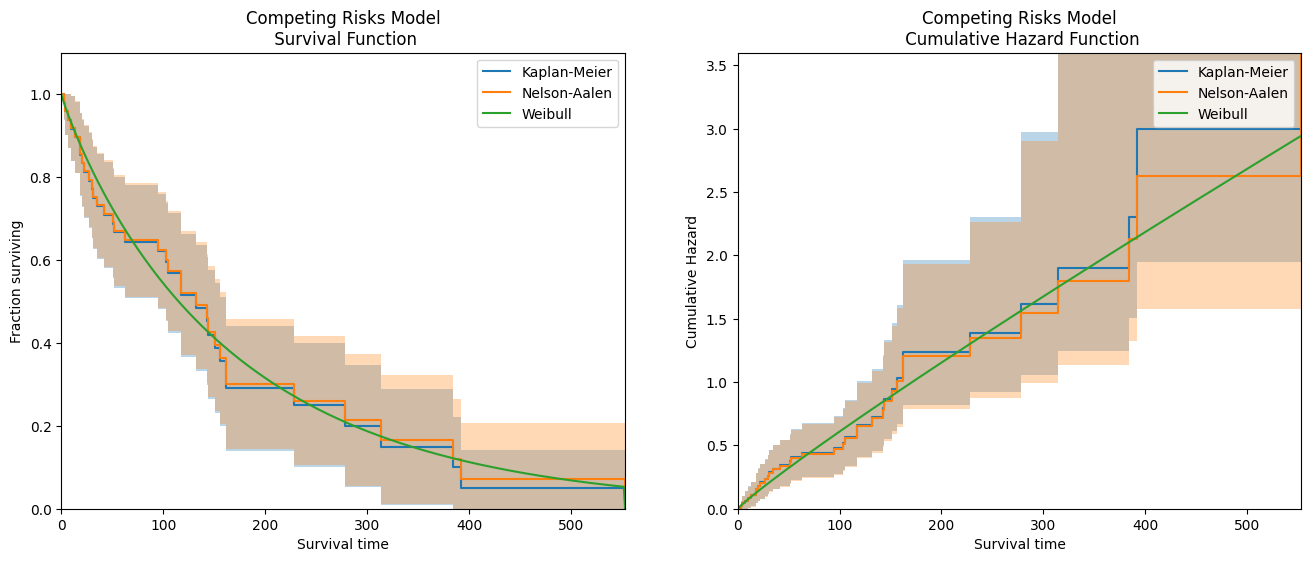

In [84]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
KaplanMeier(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, print_results=False, label='Nelson-Aalen')
Weibull_CR_dist.SF(label='Weibull')
plt.xlabel("Survival time")
plt.legend()

plt.subplot(122)
KaplanMeier(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Nelson-Aalen')
Weibull_CR_dist.CHF(label='Weibull')
plt.xlabel("Survival time")
plt.legend()

plt.show()

## Placebo

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 37/12 (24.4898% right censored) 

   Distribution   Alpha     Beta    Gamma Alpha 1   Beta 1 Alpha 2    Beta 2 Proportion 1 DS      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
     Weibull_CR                             137.3 0.862284     587 4.301e+06                                                   -205.432 419.773 426.432 1.81674       TNC
 Exponential_1P                                                                                              0.00729639        -219.054 440.193     442 2.18668       TNC
       Gamma_3P 217.071  0.66814   0.9999                                                                                      -215.972 438.477  443.62 1.81247       TNC
     Weibull_3P 128.505 0.775199   0.9999                                                                                       -216.42 439.372 444.514 1.71301       TNC
 Loglogistic_2P 75.0473     1.29       

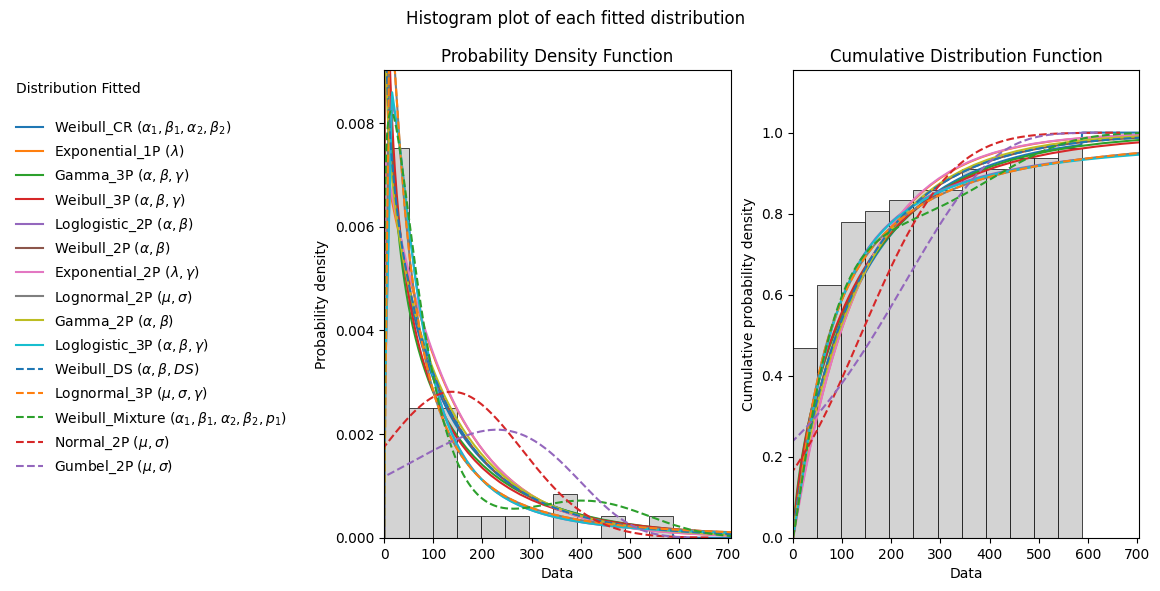

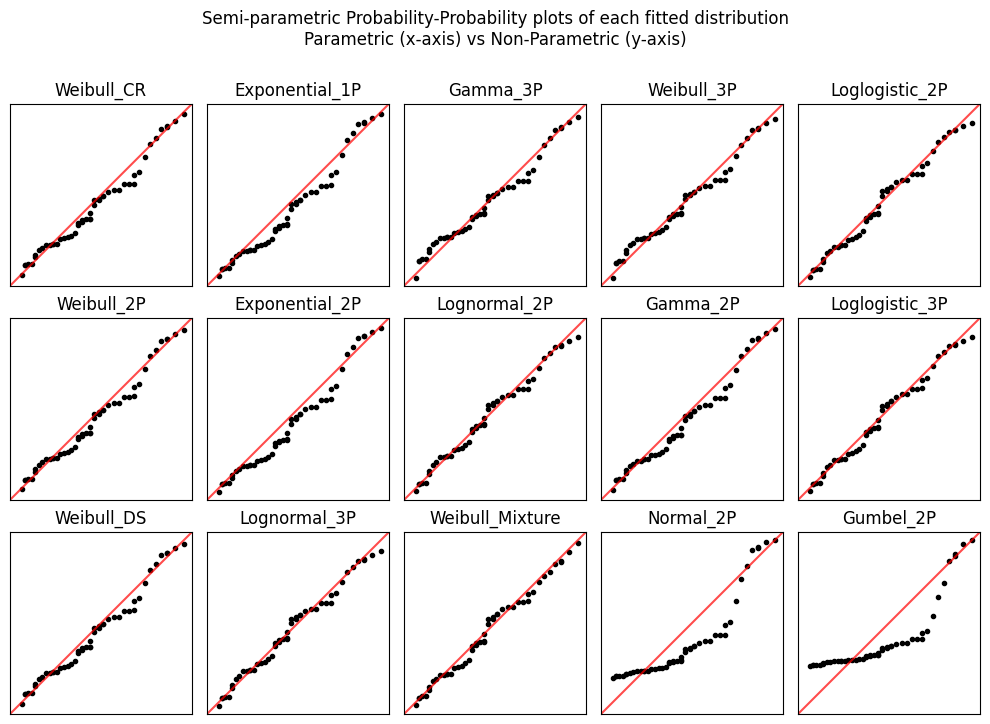

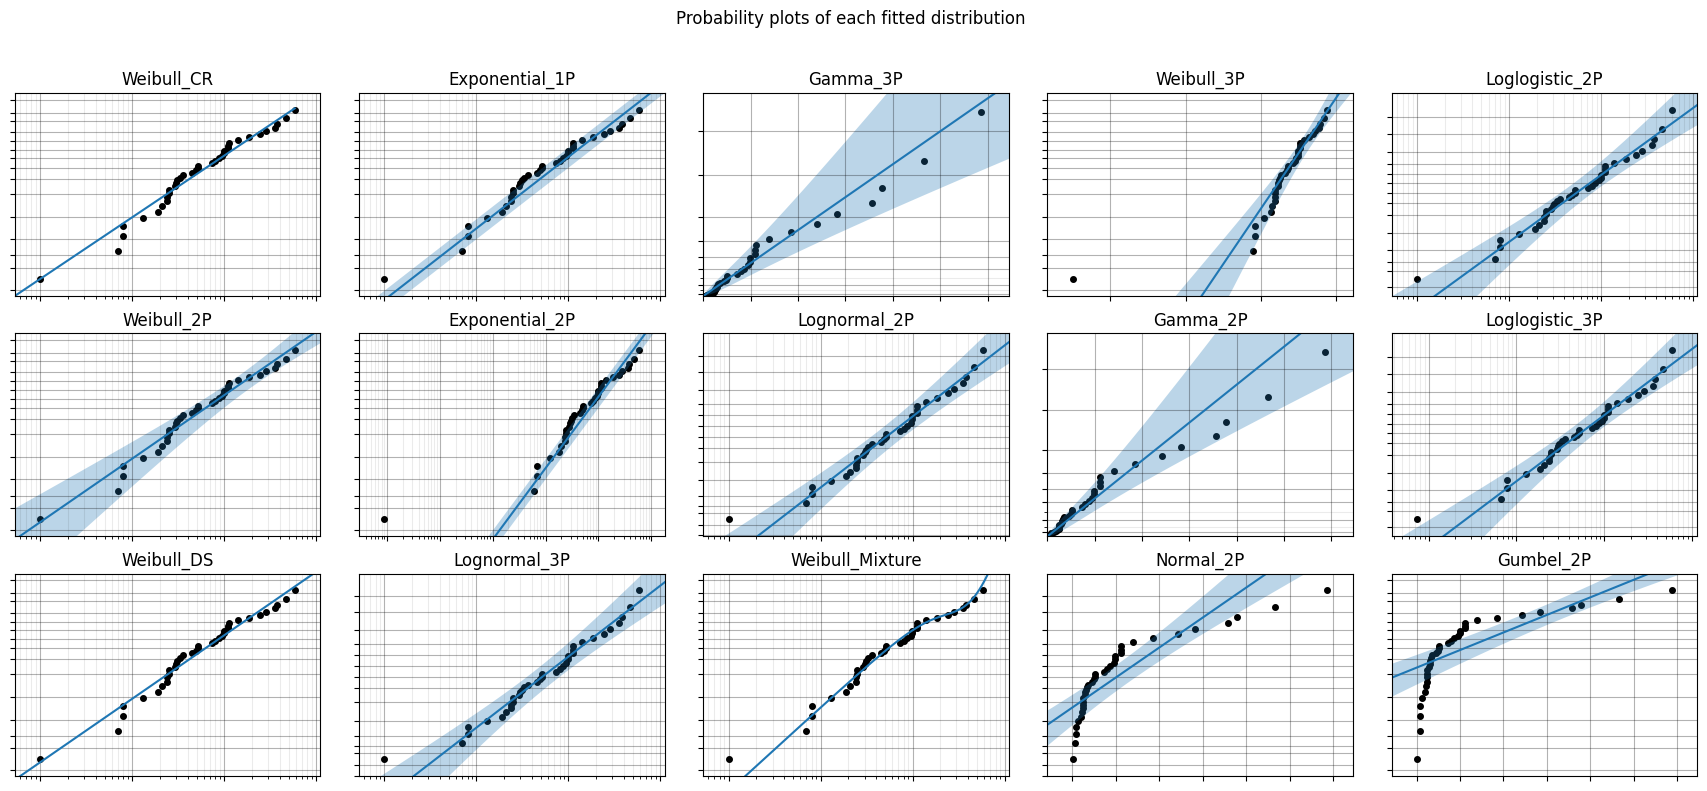

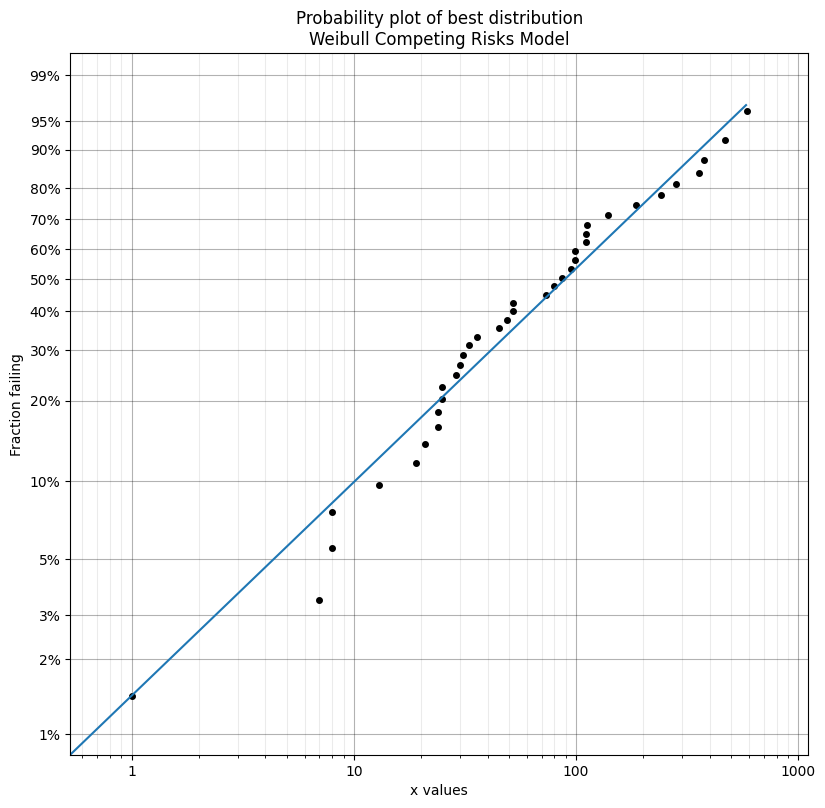

In [85]:
stat_test = Fit_Everything(failures = test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values)

In [86]:
Weibull_CR_dist2 = Fit_Weibull_CR(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, show_probability_plot=False,).distribution

Results from Fit_Weibull_CR (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 37/12 (24.4898% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI    Upper CI
  Alpha 1           137.3         26.7867   93.6709     201.251
   Beta 1        0.862284        0.108302  0.674125     1.10296
  Alpha 2             587     0.000136661       587         587
   Beta 2       4.301e+06     4.30105e+06    605841 3.05338e+07 

Goodness of fit    Value
 Log-likelihood -205.432
           AICc  419.773
            BIC  426.432
             AD  1.81674 



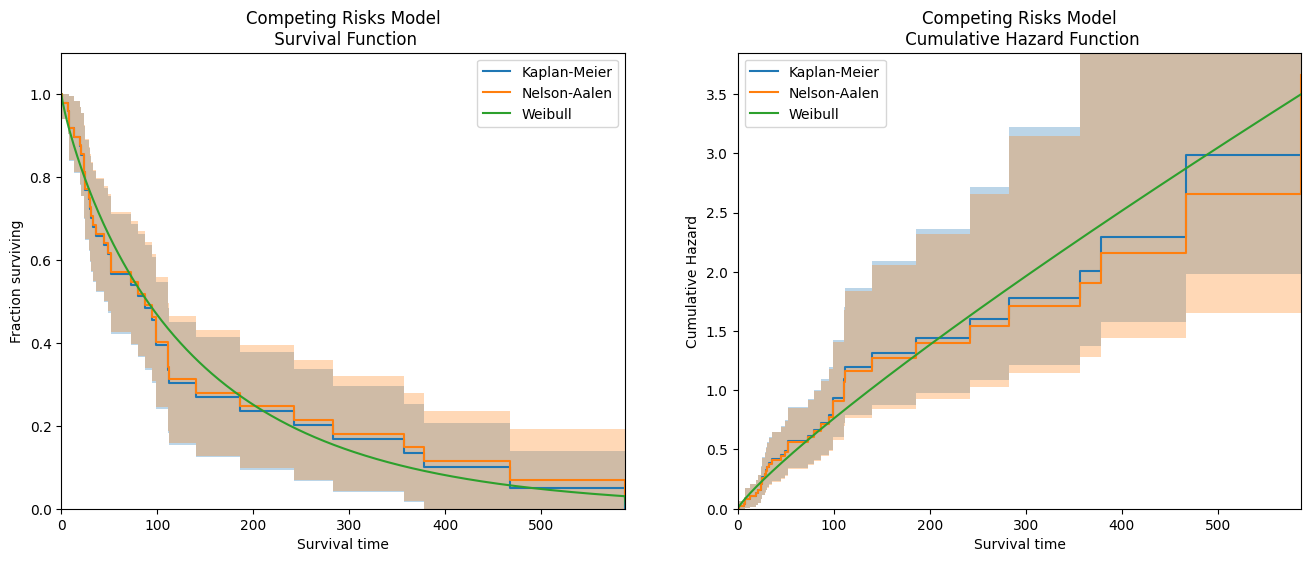

In [87]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
KaplanMeier(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, print_results=False, label='Nelson-Aalen')
Weibull_CR_dist2.SF(label='Weibull')
plt.xlabel("Survival time")
plt.legend()

plt.subplot(122)
KaplanMeier(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, plot_type='CHF', print_results=False, label='Nelson-Aalen')
Weibull_CR_dist2.CHF(label='Weibull')
plt.xlabel("Survival time")
plt.legend()

plt.show()

## Porovnání lék/placebo

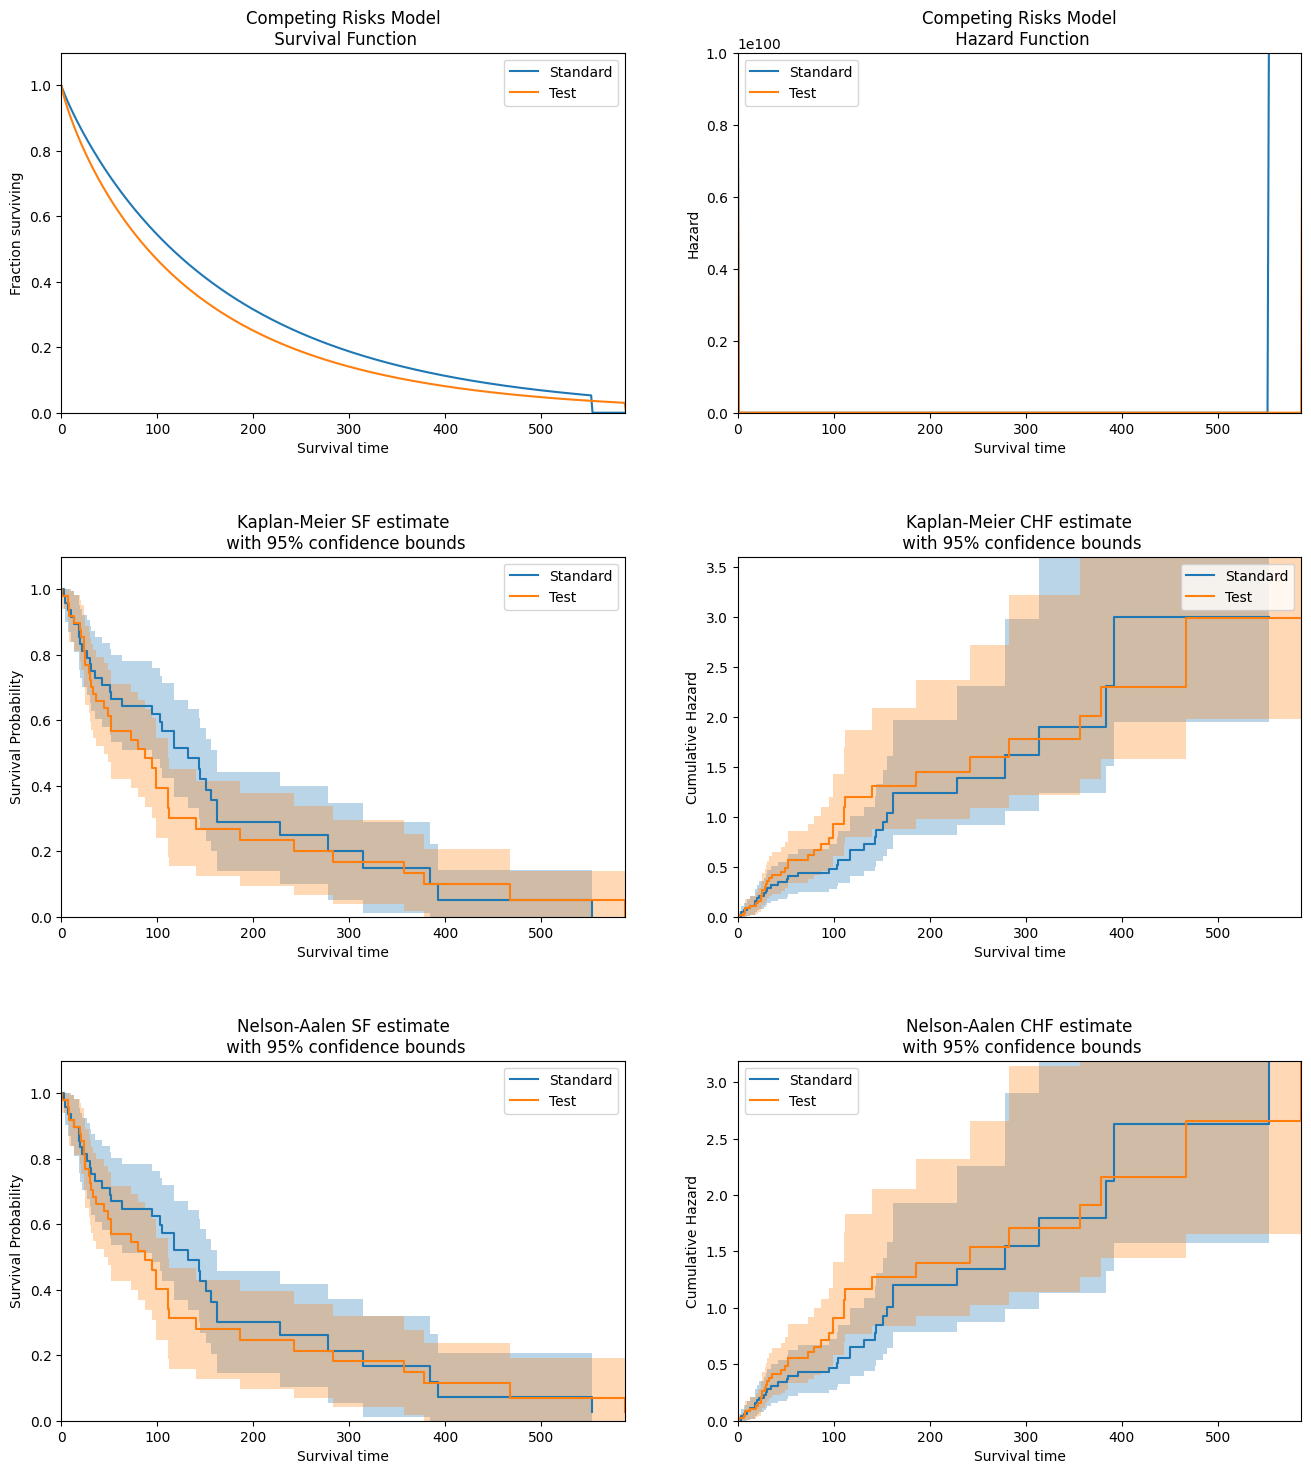

In [88]:
plt.figure(figsize=(16, 18))

plt.subplot(321)
Weibull_CR_dist.SF(label='Standard')
Weibull_CR_dist2.SF(label='Test')
plt.xlabel("Survival time")
plt.legend()

plt.subplot(322)
Weibull_CR_dist.HF(label='Standard')
Weibull_CR_dist2.HF(label='Test')
plt.xlabel("Survival time")
plt.legend()

plt.subplot(323)
KM_standard = KaplanMeier(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, print_results=False, label='Standard')
KM_test = KaplanMeier(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, print_results=False, label='Test')
plt.xlabel("Survival time")
plt.ylabel("Survival Probability")
plt.legend()

plt.subplot(324)
KaplanMeier(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, plot_type = 'CHF', print_results=False, label='Standard')
KaplanMeier(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, plot_type = 'CHF', print_results=False, label='Test')
plt.xlabel("Survival time")
plt.ylabel("Cumulative Hazard")
plt.legend()

plt.subplot(325)
NA_standard = NelsonAalen(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, print_results=False, label='Standard')
NA_test = NelsonAalen(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, print_results=False, label='Test')
plt.xlabel("Survival time")
plt.ylabel("Survival Probability")
plt.legend()

plt.subplot(326)
NelsonAalen(failures=standard.query('cens==1').survt.values, right_censored=standard.query('cens==0').survt.values, plot_type = 'CHF', print_results=False, label='Standard')
NelsonAalen(failures=test.query('cens==1').survt.values, right_censored=test.query('cens==0').survt.values, plot_type = 'CHF', print_results=False, label='Test')
plt.xlabel("Survival time")
plt.ylabel("Cumulative Hazard")
plt.legend()

plt.subplots_adjust(hspace=0.4)

plt.show()

# B) Statistiky

In [89]:
standard_kmf = KaplanMeierFitter()
standard_wbf = WeibullFitter()
standard_kmf.fit(standard.survt, event_observed=standard.cens)
standard_wbf.fit(standard.survt, event_observed=standard.cens)

test_kmf = KaplanMeierFitter()
test_wbf = WeibullFitter()
test_kmf.fit(test.survt, event_observed=test.cens)
test_wbf.fit(test.survt, event_observed=test.cens)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 49 total observations, 12 right-censored observations>

In [90]:
# Intenzita poruch (pro Weibull model)
print("Standard:")
print("Scale (lambda): ", standard_wbf.lambda_, "Shape (rho): ", standard_wbf.rho_)
print("Test:")
print("Scale (lambda): ", test_wbf.lambda_, "Shape (rho): ", test_wbf.rho_)

Standard:
Scale (lambda):  165.5755586097269 Shape (rho):  0.9619001339812365
Test:
Scale (lambda):  133.0828514721608 Shape (rho):  0.8881509118130093


In [91]:
# MTTF
MTTF_km_standard = auc(KM_standard.xvals, KM_standard.SF)
MTTF_na_standard = auc(NA_standard.xvals, NA_standard.SF)
MTTF_km_test = auc(KM_test.xvals, KM_test.SF)
MTTF_na_test = auc(NA_test.xvals, NA_test.SF)

print('Standard:')
print('Kaplan-Meier = ', MTTF_km_standard)
print('Nelson-Aalen = ', MTTF_na_standard)
print('Test:')
print('Kaplan-Meier = ', MTTF_km_test)
print('Nelson-Aalen = ', MTTF_na_test)

Standard:
Kaplan-Meier =  162.18624286669393
Nelson-Aalen =  169.53232108474455
Test:
Kaplan-Meier =  143.9862357417937
Nelson-Aalen =  151.13849081829915


In [92]:
# Mediánová doba života
print("Standard:")
print("Median Survival Time: ", standard_kmf.median_survival_time_)
print("Test:")
print("Median Survival Time: ", test_kmf.median_survival_time_)

Standard:
Median Survival Time:  132.0
Test:
Median Survival Time:  87.0


# C) Grafické srovnání log-logR

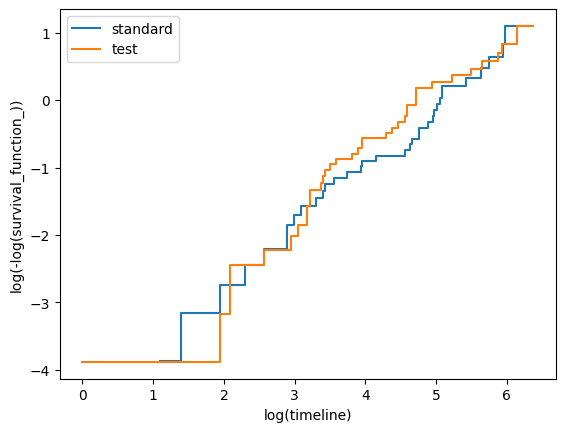

In [93]:
standard_kmf.plot_loglogs(label='standard')
test_kmf.plot_loglogs(label='test')
plt.legend(['standard','test'])